<p style='color:#1262c2; font-size:32px; text-align:left'> <strong> American Insurance Disasters </strong>
</p>
<p style='color:grey; font-size:24px; text-align:right'>Estimer le coût de la couverture médicale d'un.e américain.e</p>

 <p style="color:#4dc71f;"> 
  Data analyses and preprocessing<br>
  Training set/Testing set/Validation set <br>
  Model/Hyperparameters optimization <br>
  Training of the model  <br>
  Evaluation of the model <br>
  Predictions <br>
</p>


<p style="color:#560588;"> 
  Lolita <br>
   <br>
</p>

# Sommaire <a class="anchor" id="Sommaire"></a>


- [Prérequis](#Prérequis)
- [I. Chargement des données](#Chargement-des-données)
- [II. Exploration des données](#Exploration-des-données)
- [III. Visualisation des données](#visualisation-des-données)
- [IV. Régression linéaire multiple](#Régression-Multiple)
- [V. test pour choisir meilleurs modèles](#test-pour-choisir-meilleur-modèle)
- [VI. Random Forest](#Random-forest)
- [Conclusion générale](#conclusion)

# Contexte et objectif du projet

<p>Une nouvelle compagnie d'assurance maladie souhaite proposer une formule personnalisée à ses futurs.es clients.es.

Afin d'établir son business model, la compagnie doit être en mesure d'estimer les frais médicaux facturés par l'assurance santé pour ses prospects.

Elle fait appel à votre start-up qui développe des solutions en IA pour développer un modèle de machine learning capable de prédire les frais médicaux de ses prospects.

La compagnie d'assurance fournit à votre start-up un historique des dépenses en frais de santé.
</p>

# Prérequis <a class="anchor" id="Imports"></a>

In [74]:
import pandas as pd
import numpy as np
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn import metrics
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import plotly.io as pio

%matplotlib inline

# Chargement des données

In [3]:

df_data = pd.read_csv("https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/d51b9368-7437-420c-975c-81cac8790b68.csv",
                     sep=",")

## Enregistrement des données au format csv

In [4]:
df_data.to_csv("data.csv")
df_data_ = df_data.copy()

# Exploration des données

## lecture des données 

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_data)
prof.to_file(output_file='rapport.html')

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# lecture des 5 premières lignes 
df_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
# lecture des 5 dernières lignes 
df_data.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [10]:
# lecture de lignes choisies au hasard ds la df
df_data.sample(5)

age     sex     bmi  children smoker     region      charges
25    59  female  27.720         3     no  southeast  14001.13380
824   60    male  24.320         0     no  northwest  12523.60480
747   19    male  21.755         0     no  northwest   1627.28245
519   31    male  30.875         0     no  northeast   3857.75925
922   38    male  31.000         1     no  southwest   5488.26200

In [11]:
# On vérifie la volumétrie de notre dataframe
df_data.shape


(1338, 7)

In [12]:
print("Il y a", df_data.shape[0], "entités dans le jeu de donnees")
print("Il y a",df_data.shape[0], "lignes et", df_data.shape[1], "colonnes")

Il y a 1338 entités dans le jeu de donnees
Il y a 1338 lignes et 7 colonnes


 <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Analyse**
 <p style="color:#4caba9;">Nous avons un jeu de données contenant 1338 lignes et 7 colonnes. Les colonnes représentent : 
l'âge, le sexe, l 'imc, le nombre d'enfants, s'ils sont fumeurs ou non, la région et les charges </p>

## contrôle des données 

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
# contrôle des valeurs manquantes grâce à la librairie sidetable 
df_data.stb.missing()

missing  total  percent
age             0   1338      0.0
sex             0   1338      0.0
bmi             0   1338      0.0
children        0   1338      0.0
smoker          0   1338      0.0
region          0   1338      0.0
charges         0   1338      0.0

In [17]:
# analyse statistique
df_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">L'âge médian de l'échantillon étudié est de 39 ans, avec un minimum de 18 ans et un maximum de 64 ans. <br> Quant à l'indice de masse corporelle, il se situe en moyenne autour de 30.6 (classée comme de l'obésité). L'IMC minimum est de 15.96 (classée comme underweight) et le maximum est de 53.13 (classée comme de l'obésité morbide). <br> Le nombre d'enfants est en moyenne de 1. <br> Le coût de la couverture médicale (colonne charges) peut atteindre 63770 dollars mais il se situe plutôt autour d'une médiane de 9382 dollars.</p>

In [19]:
df_data.stb.freq(['smoker'])

smoker  count    percent  cumulative_count  cumulative_percent
0     no   1064  79.521674              1064           79.521674
1    yes    274  20.478326              1338          100.000000

In [20]:
df_data.stb.freq(['sex'])

sex  count    percent  cumulative_count  cumulative_percent
0    male    676  50.523169               676           50.523169
1  female    662  49.476831              1338          100.000000

In [22]:
df_data.stb.freq(['region'])

region  count    percent  cumulative_count  cumulative_percent
0  southeast    364  27.204783               364           27.204783
1  southwest    325  24.289985               689           51.494768
2  northwest    325  24.289985              1014           75.784753
3  northeast    324  24.215247              1338          100.000000

In [24]:
df_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [25]:
df_data.sort_values(by='age').head()

age     sex    bmi  children smoker     region      charges
1248   18  female  39.82         0     no  southeast   1633.96180
482    18  female  31.35         0     no  southeast   1622.18850
492    18  female  25.08         0     no  northeast   2196.47320
525    18  female  33.88         0     no  southeast  11482.63485
529    18    male  25.46         0     no  northeast   1708.00140

In [26]:
 # avoir une idée du contenus des colonnes de types object
df_data.select_dtypes('object')

sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1338 rows x 3 columns]

In [28]:
#connaitre le nombre de valeurs uniques des colonnes objects
{column :len(df_data[column].unique())for column in df_data.select_dtypes('object').columns} 

{'sex': 2, 'smoker': 2, 'region': 4}

> Le coefficient Sk (skewness) évalue le défaut de symétrie d'une distribution. Il est nul pour une distribution symétrique (par exemple une distribution normale, ou une distribution binomiale avec p=0,5). Il est positif pour une distribution "étalée à droite". Il est négatif pour une distribution étalée à gauche.

> Le coefficient d’aplatissement (en américain, kurtosis) est un coefficient particulièrement difficile à interpréter. On sait que, dans le cas d’une loi normale, il est égal à 3, et en le comparant à cette valeur, on compare la forme de la densité observfée (l’histogramme) à celle de la loi normale (la courbe en cloche). L’interprétation consiste à expliquer les conséquences sur la forme de la densité observée d’un coefficient suprieur ou inférieur à 3.

>> Un kurtosis élevé indique que la distribution est plutôt pointue. À l'opposé, un kurtosis proche de zéro indique une distribution relativement aplatie pour une même variance.

In [31]:
#from scipy.stats import kurtosis
#from scipy.stats import skew
dict_characteristics={"Kurtosis": [kurtosis(df_data[col]) for col in ["age",'bmi', "children", "charges"]],
                      "Skew":[skew(df_data[col]) for col in ["age",'bmi', "children", "charges"]]}
pd.DataFrame(dict_characteristics, index=['age', 'bmi', 'children', "charges"])

Kurtosis      Skew
age      -1.244921  0.055610
bmi      -0.055023  0.283729
children  0.197217  0.937328
charges   1.595821  1.514180

# encodage des valeurs 

In [34]:
# On affecte la fonction labelEncoder() à Encoder
Encoder = LabelEncoder()
# labelEncoder() va transformer / convertir les valeurs de la cible en chiffres (allant de 0 à n-1)

# On affecte cette transformation à la colonne sex de la dataframe avec .fit_transform
Encoder.fit_transform(df_data['sex'])
# On associe cette transformation sur la colonne sex à la colonne sex de df_cmed
# En résumé, on écrase l'ancienne version avec la nouvelle !
df_data['sex']=Encoder.fit_transform(df_data['sex'])

# On affecte cette transformation à la colonne smoker de la dataframe avec .fit_transform
Encoder.fit_transform(df_data['smoker'])
# On associe cette transformation sur la colonne smoker à la colonne sex de df_cmed
# En résumé, on écrase l'ancienne version avec la nouvelle !
df_data['smoker']=Encoder.fit_transform(df_data['smoker'])

# On affecte cette transformation à la colonne region de la dataframe avec .fit_transform
Encoder.fit_transform(df_data['region'])
# On associe cette transformation sur la colonne region à la colonne sex de df_cmed
# En résumé, on écrase l'ancienne version avec la nouvelle !
df_data['region']=Encoder.fit_transform(df_data['region'])

# On affiche les dix premières lignes de la dataframe une fois les modifications apportées
df_data.head() 

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

# visualisation des données

In [38]:
#Distribution des charges
fig = px.box(df_data, 
                 y="charges",
                 title="Distribution des charges",
                 points="all")
fig.show()

In [41]:
# Distribution des charges par région

fig = px.box(df_data, 
                 y="charges",
                 x="region",
                 title="Distribution des charges par région",
                 color="region",
                 points="all", template="plotly_dark") # on met le template en dark 
fig.show()

In [43]:
# Distribution des charges par sexe

fig = px.box(df_data, 
                 y="charges",
                 x="sex",
                 title="Distribution des charges par sex",
                 color="sex",
                 points="all", template = "simple_white")
fig.show()

In [45]:
# Distribution des charges par fumeur
fig = px.box(df_data, 
                 y="charges",
                 x="smoker",
                 title="Distribution des charges par fumeur",
                 color="smoker",
                 points="all")
fig.show()

## heatmap pour voir valeurs coorélées

<AxesSubplot:>

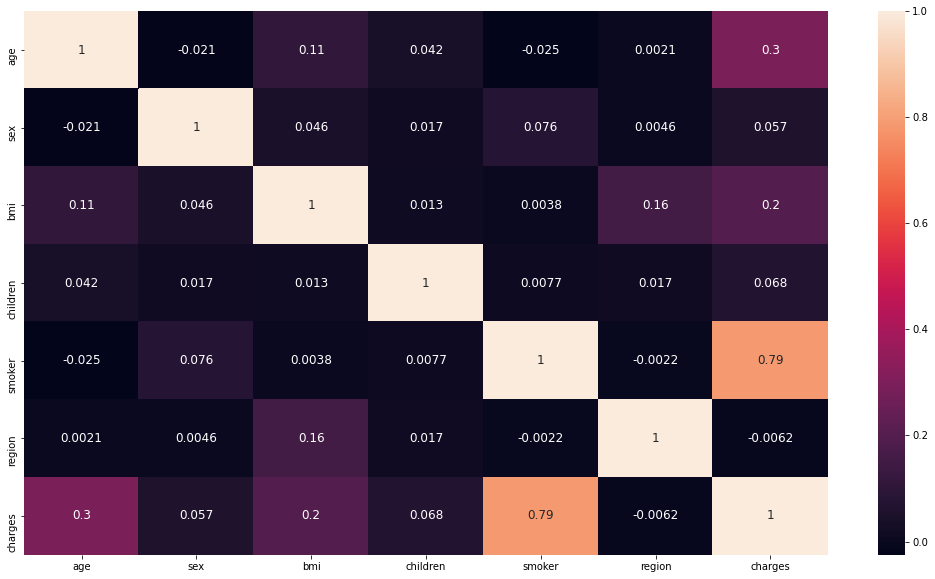

In [46]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df_data.corr(), annot = True, annot_kws={'size':12})

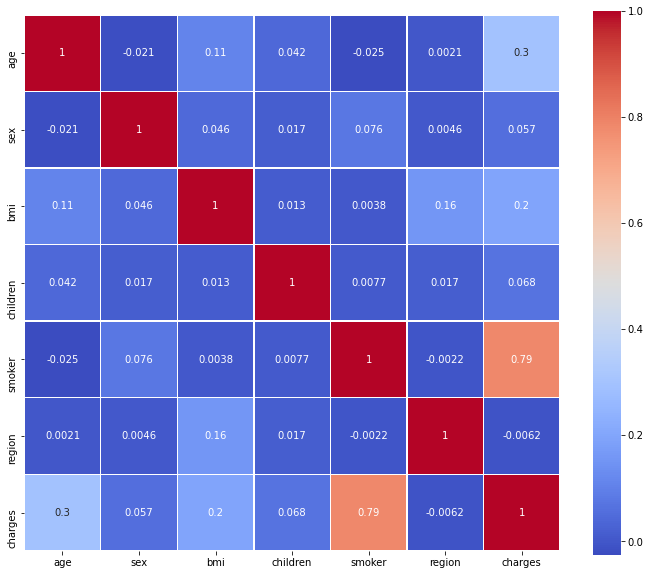

In [47]:
# Heatmap pour pouvoir identifier rapidement par code couleur les valeurs les plus corrélées

cor = df_data.corr() 

plt.subplots(figsize=(12,10))
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True );

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Observations**
> <p style="color:#4caba9;">Une corrélation positive retient toute notre attention : celle de la colonne smoker avec charges (0.79) ! <br> C'est la seule colonne qui semble être corrélée avec une autre.</p>

<AxesSubplot:xlabel='bmi', ylabel='charges'>

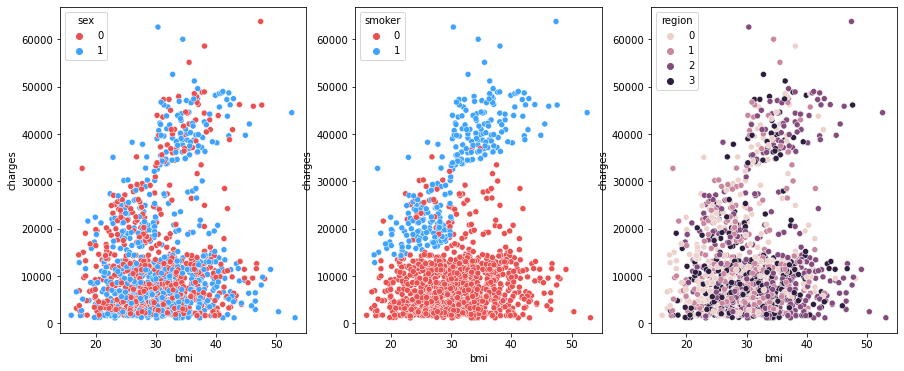

In [49]:
palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='charges', ax=axes[0], data=df_data,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='charges', ax=axes[1], data=df_data,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='charges', ax=axes[2], data=df_data,hue='region')

# Régression Multiple

In [50]:
reg_multi = smf.ols('charges~age+sex+bmi+children+smoker+region', data=df_data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        23:16:22   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.182e+04    955.130    -12.371      0.0

On peut constater que la variable sex présente une p value pas intéressante.

In [52]:
reg_multi1 = smf.ols('charges~age+bmi+children+smoker+region', data=df_data).fit()
print(reg_multi1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        23:17:11   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.187e+04    945.876    -12.546      0.0

Ce modèle semble être le plus approprié avec un R² de 0.750.

In [54]:
reg_multi = smf.ols('charges~age+bmi+children+smoker', data=df_data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        23:17:52   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04    941.984    -12.848      0.0

En enlevant la variable région on constate que ce modèle presente un R² de 0.749

# test pour choisir meilleur modèle

## Entrainement de notre modèle

In [56]:
dataml = df_data[['age', 'bmi', 'children', 'smoker', 'region', 'charges']]
dataml.head(2) # on créé une nouvelle df qui reprends juste les variables dont on a besoin 

age    bmi  children  smoker  region     charges
0   19  27.90         0       1       3  16884.9240
1   18  33.77         1       0       2   1725.5523

In [57]:
def prepocess_inputs(df):
    df = df.copy()
    
    
    # Encodage Valeur avec methode oneHotencoder
    Encoder = LabelEncoder()
    Encoder.fit_transform(dataml['smoker'])
    dataml['smoker']=Encoder.fit_transform(dataml['smoker'])
    Encoder.fit_transform(dataml['region'])
    dataml['region']=Encoder.fit_transform(dataml['region'])

       # Split df into X and y
    y = dataml['charges']
    #X =df.drop('charges', axis=1)
    X = dataml.drop('charges', axis =1)
       
    
    # Train- test into split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state= 1, stratify=df['smoker']) 
    
        #Scale X normaliser les valeurs avec un scalaire
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns) # renvoies un df
    X_test = pd.DataFrame(scaler.transform(X_test), columns= X.columns)
    
    return X_train, X_test, y_train, y_test

# le sclaire standart est un moyen afin de pouvoir utiliser un nb de sclaire différents. Ici StandardScaler() va donner à chaque colonne
#une moyenne de 0 et une variance de 1

In [58]:
X_train, X_test, y_train, y_test = prepocess_inputs(dataml)

In [59]:
X_train

age       bmi  children    smoker    region
0     0.130670 -1.477980 -0.074527 -0.507291  0.449437
1    -1.152711  3.255658 -0.074527 -0.507291  0.449437
2    -0.724917 -0.774555 -0.913939 -0.507291 -0.454505
3     0.487165  0.263204  0.764885 -0.507291 -1.358447
4    -0.154526  0.561125  2.443709  1.971255  1.353378
...        ...       ...       ...       ...       ...
1065  1.342753  0.184586  0.764885 -0.507291 -1.358447
1066  0.914959  1.128003  0.764885 -0.507291 -0.454505
1067  1.627949  0.373269  1.604297 -0.507291 -0.454505
1068 -0.582319 -0.148920 -0.913939  1.971255  0.449437
1069 -0.368422  0.420440 -0.074527 -0.507291 -1.358447

[1070 rows x 5 columns]

In [60]:
y_train

42       6272.47720
847      2438.05520
625      3736.46470
394      9411.00500
621     40182.24600
           ...     
56      13607.36875
599     33471.97189
36      15612.19335
1179    19350.36890
597      5594.84550
Name: charges, Length: 1070, dtype: float64

In [63]:
# entrainement du modèle 
models = {
"                     LinearRegression"   : LinearRegression(),
"                   K-Nearest Neighbor"   : KNeighborsRegressor(),
"                        Decision Tree"   : DecisionTreeRegressor(),
"                        Random Forest"   : RandomForestRegressor(),

}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     LinearRegression trained.
                   K-Nearest Neighbor trained.
                        Decision Tree trained.
                        Random Forest trained.


In [64]:
for name, model in models.items():
    print(name + "R^2 Score:{:.5f}".format(model.score(X_test, y_test)))
    
#{:.5f} permet d'afficher à cinq décimal
# R^2 c'est le coefficient de détermination 

                     LinearRegressionR^2 Score:0.75486
                   K-Nearest NeighborR^2 Score:0.82291
                        Decision TreeR^2 Score:0.69268
                        Random ForestR^2 Score:0.83221


# Random forest

In [ ]:
#from sklearn.metrics import r2_score
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import KFold
#from sklearn import metrics

> ## Paramètres du train_test_split
> <p> <li> random_state=0 <br> équivaut à ne pas régénérer l'aléatoire à chaque chargement du bloc, il suffit de le faire juste une fois). Le random_state sert à recevoir les mêmes valeurs sans devoir recharger le bloc à chaque fois. C'est comme si nous avions toujours le même générateur. On peut mettre dans random_state : int, RandomState, None.


> <li> Stratify = y      <br> Ce paramètre effectue un fractionnement afin que la proportion de valeurs dans l'échantillon produit soit la même que la proportion de valeurs fournies au paramètre stratify.
> 


> <li> shuffle= True     <br> mélanger des valeurs


> 
> <li> train_size        <br> la volumétrie de notre set d'entraînement


> 
> <li> test_size         <br> la volumétrie de notre set de test                                    
 </p> 

## recherches des meilleurs paramètres

In [66]:
regressor = RandomForestRegressor()
cv_sets = KFold(n_splits=10, shuffle=True, random_state=42)

In [68]:
params = dict(max_depth=range(1,10))



def performance_metric(y, y_pred) :
    # renvoie R²
    return r2_score(y,y_pred)


In [69]:
scoring_fnc = make_scorer(performance_metric)
# Nous utilisons GridSearchCV pour déterminer quels sont les paramètres optimaux

grid_cv = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

In [70]:
## On entraîne le modèle avec le GridSearchCV 
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 10)},
             scoring=make_scorer(performance_metric))

In [71]:
# On demande à GridSearchCV de nous sélectionner les meilleurs paramètres : les optimaux !
best_tree = grid_cv.best_estimator_
best_tree


RandomForestRegressor(max_depth=4)

In [72]:
# une autre méthode 
best_params = grid_cv.best_params_
best_params

{'max_depth': 4}

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

<ipython-input-75-8369f0bdef8a>:32: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



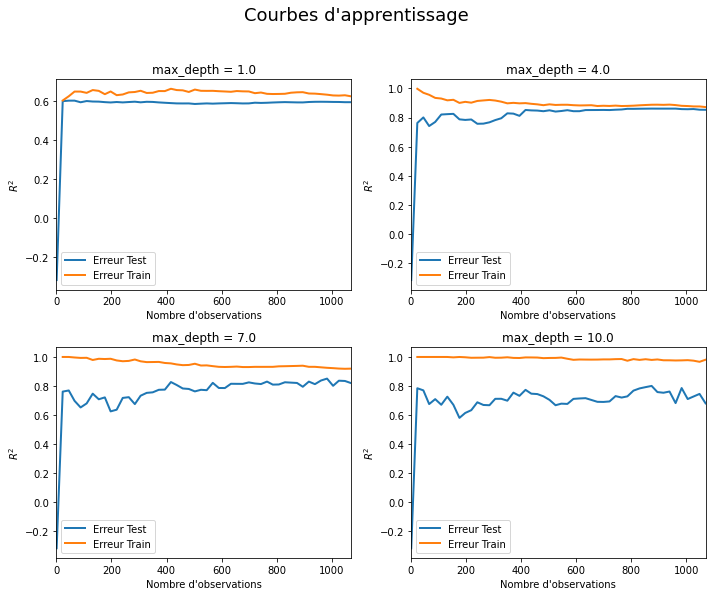

In [75]:
fig = plt.figure(figsize=(10,8))

sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
train_score = np.zeros(len(sizes))
test_score = np.zeros(len(sizes))

for k, depth in enumerate(np.linspace(1,10,4)):

    for i, s in enumerate(sizes):
    
        regressor = DecisionTreeRegressor(max_depth = depth)

        regressor.fit(X_train[:s], y_train[:s])

        train_score[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))

        test_score[i] = performance_metric(y_test, regressor.predict(X_test))


    ax = fig.add_subplot(2, 2, k+1)
    ax.plot(sizes, test_score, lw = 2, label = 'Erreur Test')
    ax.plot(sizes, train_score, lw = 2, label = 'Erreur Train')
    ax.legend()
    ax.set_title('max_depth = %s'%(depth))
    ax.set_xlabel("Nombre d'observations")
    ax.set_ylabel('$R^{2}$')
    ax.set_xlim([0, len(X_train)])


fig.suptitle("Courbes d'apprentissage", fontsize=18, y=1.03)
fig.tight_layout()
fig.show()

## Régression avec une profondeur de 4 

In [76]:
best_regressor = RandomForestRegressor(max_depth=4, random_state=42,  min_samples_split=10, n_estimators=100)
best_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=10, random_state=42)

In [84]:
n_nodes = []
max_depths = []

for ind_tree in best_regressor.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Nombre moyen de noeuds {int(np.mean(n_nodes))}')
print(f'Pronfondeur maximale moyenne {int(np.mean(max_depths))}')

Nombre moyen de noeuds 30
Pronfondeur maximale moyenne 4


In [78]:
#pip install pydotplus
#PyDotPlus est une version améliorée de l'ancien projet pydot qui fournit une interface Python au langage Dot de Graphviz.

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=80e35d3aa76d7fe4bf5528245df0d729e1f75c94a11924f8f4081665c262a184
  Stored in directory: c:\users\utilisateur\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


## visualisation du modèle

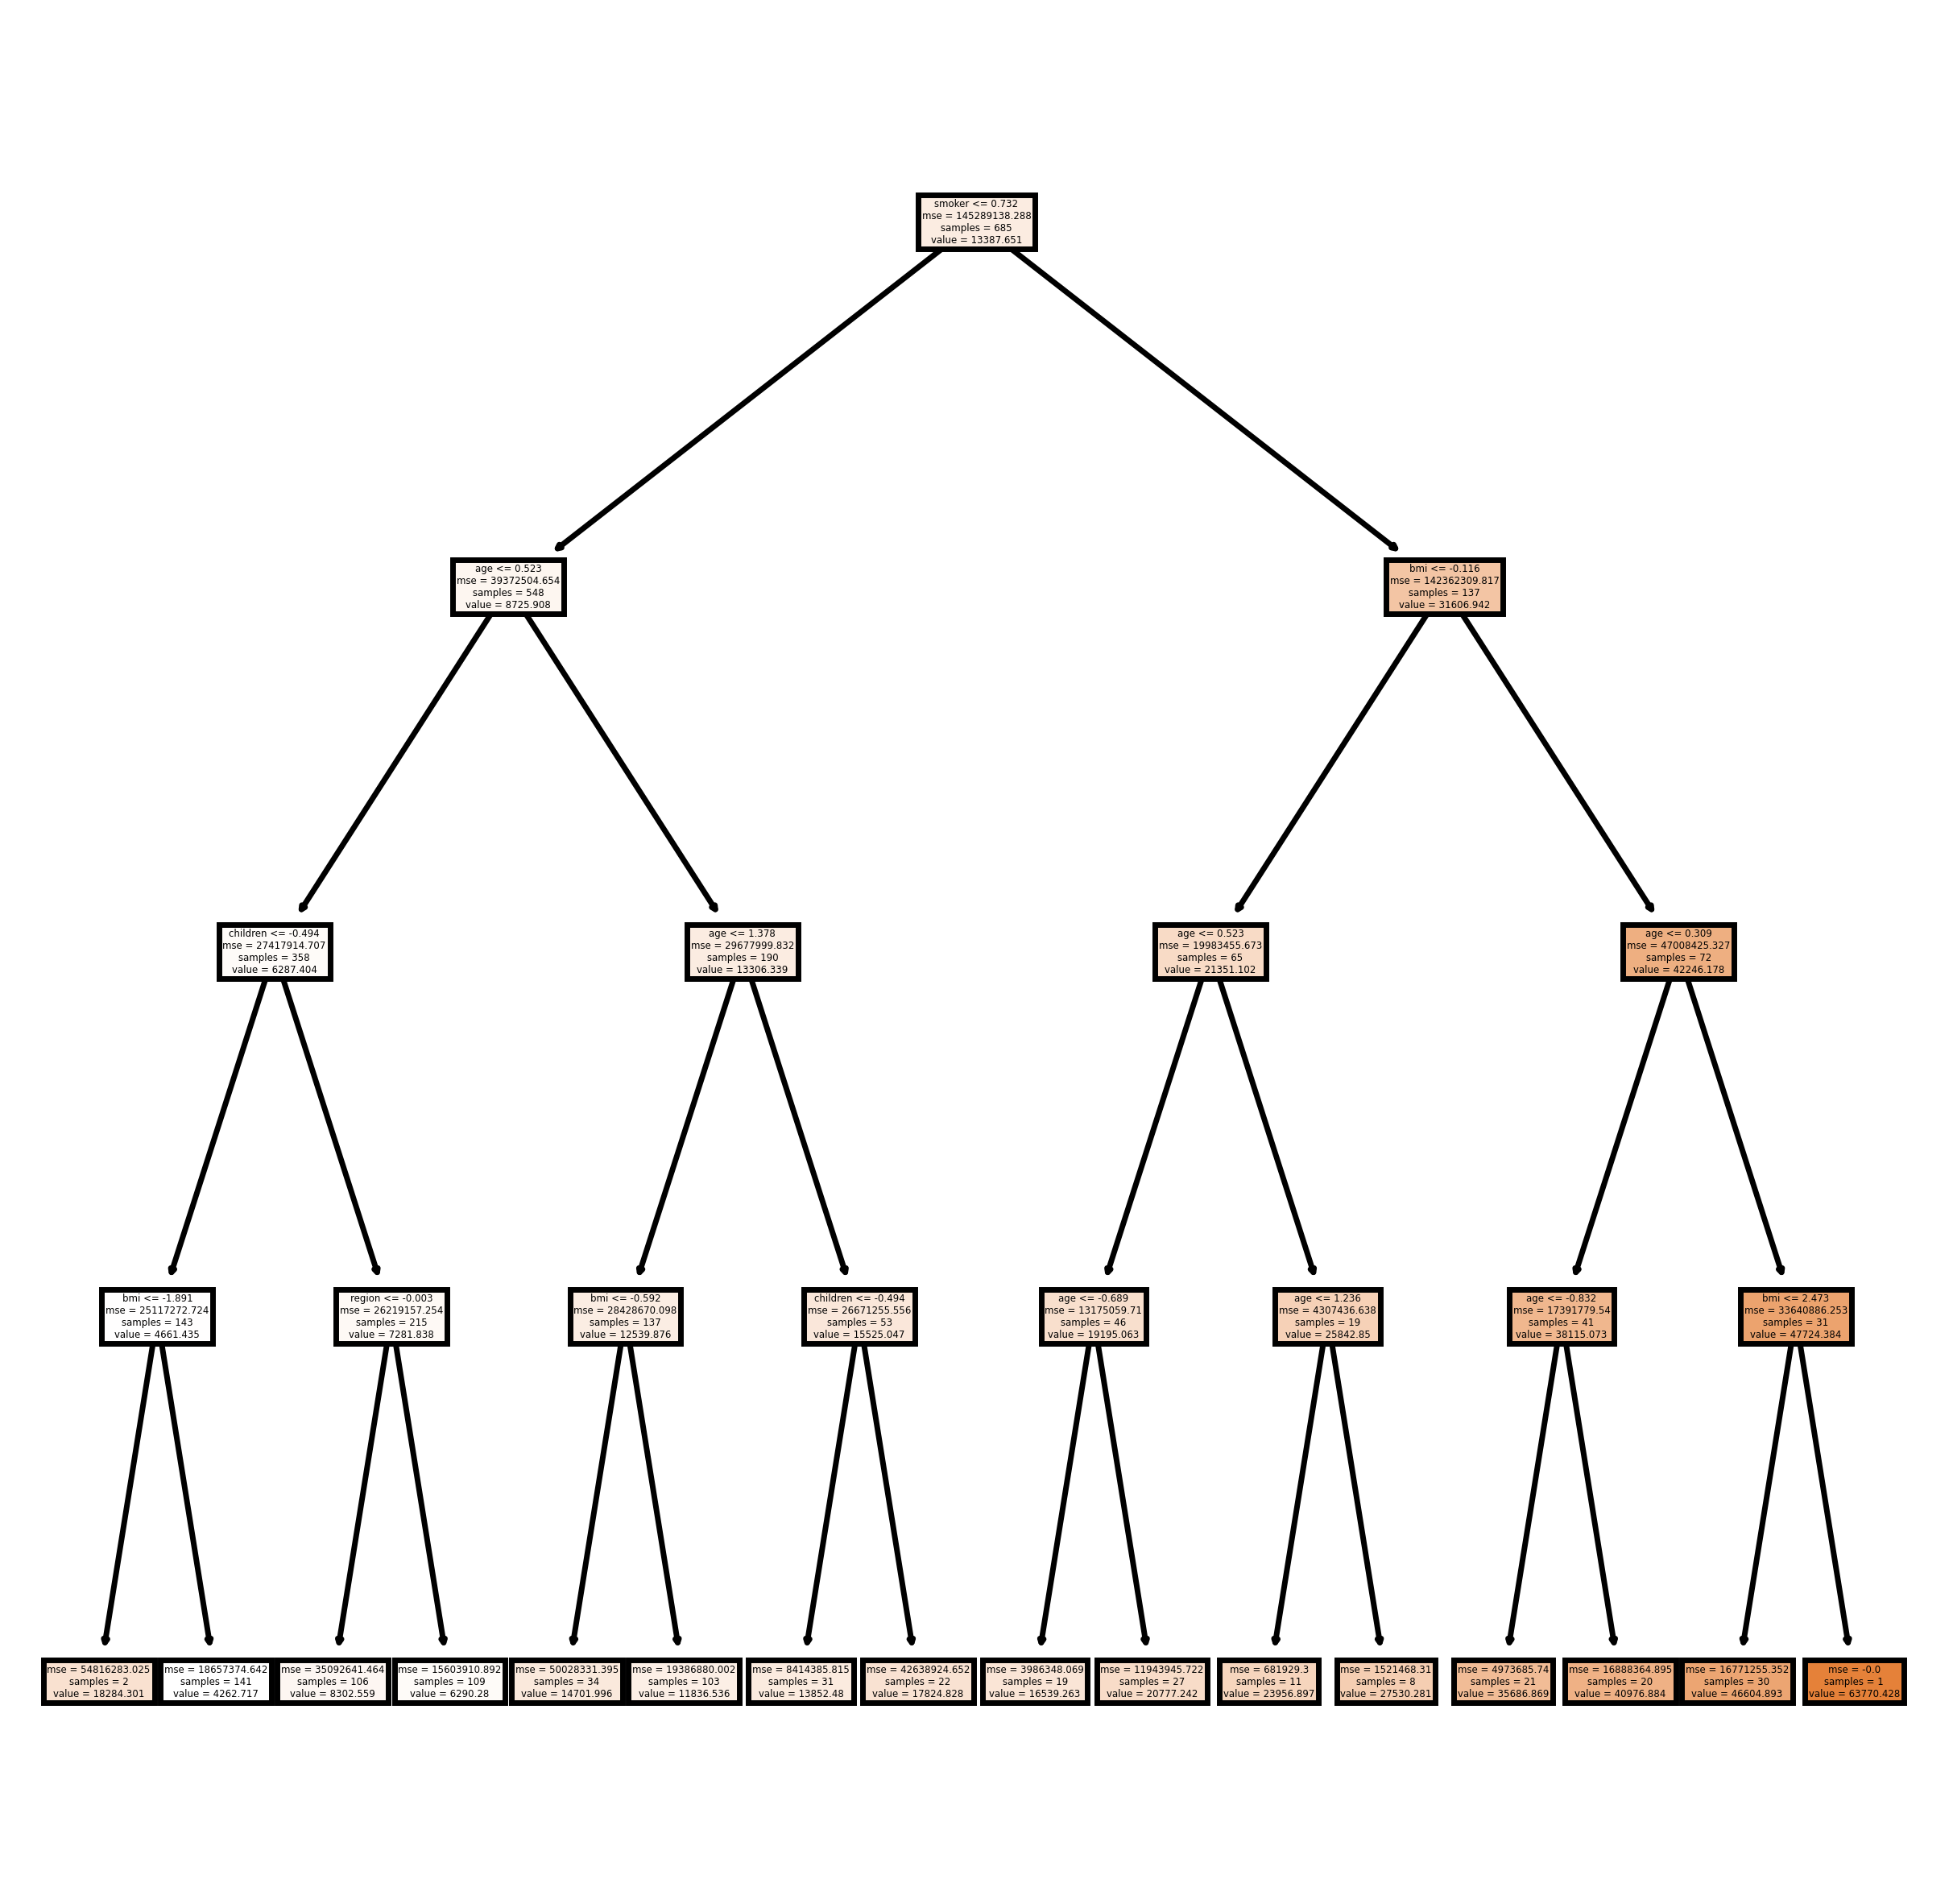

In [79]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
from sklearn import tree


os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
# dot_data = StringIO()
# export_graphviz(best_regressor.estimators_[0], out_file=dot_data, filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# Image(graph.create_png())

dot_data = tree.export_graphviz(best_regressor.estimators_[0], out_file= None,
                        #   feature_names = data.feature_names,
                          filled = True,
                          class_names = 'class')
fn = ['age', 'bmi', 'children', 'smoker', 'region']
fig, axes = plt.subplots(figsize = (6,6), dpi=500)
tree.plot_tree(best_regressor.estimators_[0],
               feature_names = fn, 
               class_names='Charges',
               filled = True)
fig.savefig('tree.png')

In [80]:
y_pred = best_regressor.predict(X_test)

Text(0.5, 0, 'Relative Importance')

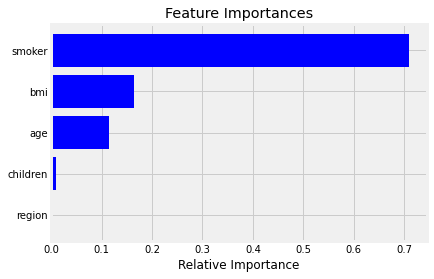

In [81]:
liste_variables = list(dataml.columns)
importances = best_regressor.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

In [82]:
df_result = dataml.copy()
tes_reg =LinearRegression()
prediction = dataml.drop('charges', axis =1)
tes_reg.fit(prediction, dataml['charges'])
#Prédiction sur les données initiales
df_result['pred_charges']  = tes_reg.predict(prediction)


#calcul du MAPE (mean absolute percentage error)
mape = np.mean(np.abs((df_result['charges'] - df_result['pred_charges']) / df_result['charges'])) * 100
print("MAPE : ", round(mape,2))

df_result

MAPE :  42.29


age     bmi  children  smoker  region      charges  pred_charges
0      19  27.900         0       1       3  16884.92400  25035.678623
1      18  33.770         1       0       2   1725.55230   3751.036715
2      28  33.000         3       0       2   4449.46200   7026.295673
3      33  22.705         0       0       1  21984.47061   3813.076521
4      32  28.880         0       0       1   3866.85520   5606.030635
...   ...     ...       ...     ...     ...          ...           ...
1333   50  30.970         3       0       1  10600.54830  12368.610359
1334   18  31.920         0       0       0   2205.98080   3365.216870
1335   18  36.850         0       0       2   1629.83350   4295.285507
1336   21  25.800         0       0       3   2007.94500   1044.987740
1337   61  29.070         0       1       1  29141.36030  36942.077416

[1338 rows x 7 columns]

## evaluation du modèle

In [85]:
# Erreurs absolues
errors = abs(y_pred - y_test)
# Mean Absolute Error (MAE)
print('MAE =', round(np.mean(errors), 2), '$')

# mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Précision
prec = 100 - np.mean(mape)
print('Précision :', round(prec, 2), '%.')

score_train = best_regressor.score(X_train,y_train)
score_test = best_regressor.score(X_test,y_test)
print("score_train =",round(score_train,3),"| score_test =", round(score_test,3))

MAE = 2331.86 $
Précision : 69.21 %.
score_train = 0.878 | score_test = 0.859


On a gagné en précision, et les R² train/test sont maintenant très proche, on a donc limité l'overfitting

In [83]:
r2_score(y_test, y_pred)

0.8586553788492014

# conclusion

> <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Conclusion du random forest**
> <p style="color:#4caba9;">Le modèle utilisé ici montre que le fait d'être fumeur ou non a une influence sur le coût de la couverture médicale d'un.e américain.e. L'indice de masse corporelle puis l'âge ont également une influence, mais moindre.<br> Le score de R² ajusté du modèle est de plus de 85%, ce qui le rend meilleur que la régression linéaire multiple et l'arbre de régression.</p>